In [3]:
import re
import matplotlib.pyplot as plt
from math import log10

regex = re.compile(r"(\d+):\s+\d+\.\d+:(\d+\.?(\d+)?)")

def read_from_txt(txt):
    x_lst = []
    y_lst = []
    budget_acc_lst = []
    step = 0
    with open(txt) as fp:
        for line in fp:
            line = line.rstrip('\n')
            r = re.search(regex, line)
            if r is not None:
                x_lst.append(log10(float(r.group(1))))
                y_lst.append(float(r.group(2)))
    return y_lst

In [5]:
mccs_celebahq = read_from_txt('unlearning/celebahq.pkl.txt')
mccs_ffhq = read_from_txt('unlearning/ffhq.pkl.txt')

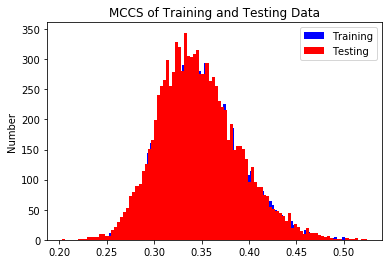

In [19]:
# Normalize
kwargs = dict(alpha=1.0, bins=100)

# Plot
plt.hist(mccs_celebahq, **kwargs, color='b', label='Training')
plt.hist(mccs_ffhq, **kwargs, color='r', label='Testing')
plt.gca().set(title='MCCS of Training and Testing Data', ylabel='Number')
#plt.xlim(0,1)
plt.legend()
plt.savefig('MCCS.png')